In [2]:
import os

files = os.listdir("./images")


In [3]:
import cv2

location = "./images/"+files[0]


img = cv2.imread('./images/IMG_9109.JPG')
imgStar = cv2.imread('./images/star.png')
newH, newW = img.shape[:2]

BLACK = [0,0,0]

newStar = cv2.copyMakeBorder(imgStar,250,250,250,250,cv2.BORDER_CONSTANT, value= BLACK)

cv2.imwrite('newStar.jpg', newStar)




True

In [4]:
import math
class manipulate:
    def compareSize(img1,img2): 
        height1, width1, = img.shape[:2] #(height, width, num layers)
        height2, width2, = img2.shape[:2]
        # test case  Height 3456 * width 5184 = img 1
        # test case 512 * 512  = img 2
        difHeight = abs(height1 - height2)
        difWidth = abs(width1 - width2)
        return (difHeight,difWidth)
    
    def createImageToMatch(img,differance):
        #in test case 2944 , 4672
        # left width
        top, bottom = math.floor((differance[0])/2),math.ceil((differance[0])/2)
        right, left = math.floor((differance[1])/2),math.ceil((differance[1])/2)
        resizedImage = cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT, value= [0,0,0])        
        return resizedImage
    def addImageToImage(img1,img2):
        dif = manipulate.compareSize(img1,img2)
        difHeight = (dif[0])//2
        difWidth = (dif[1])//2
        height, width = img2.shape[:2]
        for y in range(height):
            for x in range(width):
                if all(img2[y][x] != [0,0,0]):
                    img1[(y+difHeight)][(x+difWidth)] = img2[y][x]
        return img1
    

In [5]:
dif = manipulate.compareSize(img,imgStar)
newStar = manipulate.createImageToMatch(imgStar,dif)


newImage = manipulate.addImageToImage(img,newStar)
# cv2.imshow("check", newImage)
# cv2.imshow(-1)
cv2.imwrite("test.jpg",newImage)


True

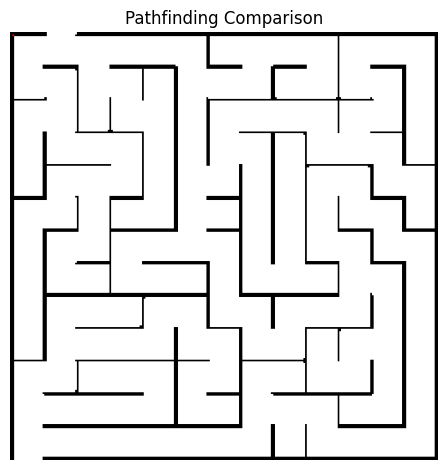

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import heapq

# Load the image
maze_path = "./maze.png"
maze_img = cv2.imread(maze_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image: white path = 255, black wall = 0
_, binary_maze = cv2.threshold(maze_img, 127, 255, cv2.THRESH_BINARY)




# Convert to 0 (wall) and 1 (path)
maze = (binary_maze == 255).astype(np.uint8)
h, w = maze.shape
start = (1, 1)
goal = (w - 2, h - 2)

# Helper: check if a pixel is in bounds and not a wall
def is_valid(x, y, visited):
    return 0 <= x < w and 0 <= y < h and maze[y, x] == 1 and not visited[y][x]

# DFS implementation
def dfs(x, y, goal, visited, path):
    if (x, y) == goal:
        path.append((x, y))
        return True
    visited[y][x] = True
    path.append((x, y))
    for dx, dy in [(1,0), (0,-1), (-1,0), (0,1)]:  # R, U, L, D
        nx, ny = x + dx, y + dy
        if is_valid(nx, ny, visited):
            if dfs(nx, ny, goal, visited, path):
                return True
    path.pop()
    return False

# BFS implementation
def bfs(start, goal):
    visited = [[False]*w for _ in range(h)]
    queue = deque([(start, [start])])
    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == goal:
            return path
        for dx, dy in [(1,0), (0,-1), (-1,0), (0,1)]:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                visited[ny][nx] = True
                queue.append(((nx, ny), path + [(nx, ny)]))
    return []

# Dijkstra implementation
def dijkstra(start, goal):
    dist = np.full((h, w), np.inf)
    prev = dict()
    dist[start[1], start[0]] = 0
    heap = [(0, start)]
    visited = set()

    while heap:
        cost, (x, y) = heapq.heappop(heap)
        if (x, y) in visited:
            continue
        visited.add((x, y))
        if (x, y) == goal:
            break
        for dx, dy in [(1,0), (0,-1), (-1,0), (0,1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < w and 0 <= ny < h and maze[ny, nx] == 1:
                new_cost = cost + 1
                if new_cost < dist[ny, nx]:
                    dist[ny, nx] = new_cost
                    prev[(nx, ny)] = (x, y)
                    heapq.heappush(heap, (new_cost, (nx, ny)))

    # Reconstruct path
    path = []
    current = goal
    while current in prev:
        path.append(current)
        current = prev[current]
    path.append(start)
    path.reverse()
    return path

# Run the algorithms
visited_dfs = [[False]*w for _ in range(h)]
dfs_path = []
dfs(start[0], start[1], goal, visited_dfs, dfs_path)
bfs_path = bfs(start, goal)
dijkstra_path = dijkstra(start, goal)

# Draw all paths on the original RGB image
maze_rgb = cv2.cvtColor(binary_maze, cv2.COLOR_GRAY2BGR)
for (x, y) in dfs_path:
    maze_rgb[y, x] = (255, 0, 0)    # Blue for DFS
for (x, y) in bfs_path:
    maze_rgb[y, x] = (0, 255, 0)    # Green for BFS
for (x, y) in dijkstra_path:
    maze_rgb[y, x] = (0, 0, 255)    # Red for Dijkstra

# Resize for easier display
resized = cv2.resize(maze_rgb, (512, 512), interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Pathfinding Comparison")
plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
def drawPath(img, path, pThick=2):
    v = path[0]
    x0, y0 = v[0], v[1]
    for v in path:
        x, y = v[0], v[1]
        cv2.line(img,(x,y), (x0,y0), (255,0,0),pThick)
        x0, y0 = x,y

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
import heapq

# Load the image
maze_path = "./maze.png"
maze_img = cv2.imread(maze_path)

h, w = maze.shape
start = (5, 220)
cv2.circle(maze_img,start, 3, (255,0,0), -1)
cv2.circle(maze_img,goal, 3, (0,0,255), -1)
goal = (5,5)

# Helper: check if a pixel is in bounds and not a wall
def is_valid(x, y, visited):
    return 0 <= x < w and 0 <= y < h and maze[y, x] == 1 and not visited[y][x]

# DFS implementation
def dfs(x, y, goal, visited, path):
    if (x, y) == goal:
        path.append((x, y))
        return True
    visited[y][x] = True
    path.append((x, y))
    for dx, dy in [(1,0), (0,-1), (-1,0), (0,1)]:  # R, U, L, D
        nx, ny = x + dx, y + dy
        if is_valid(nx, ny, visited):
            if dfs(nx, ny, goal, visited, path):
                return True
    path.pop()
    return False


visited_dfs = [[False]*w for _ in range(h)] #create a true false matrix
dfs_path = []
# dfs(start[0], start[1], goal, visited_dfs, dfs_path)

print(dfs_path)

plt.imshow(maze_img)
plt.show()

RecursionError: maximum recursion depth exceeded